In [1]:
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
import module.model as aux

# data
data_path = 'data/'
words = open(data_path + 'names.txt','r').read().splitlines()

print(f'Number of words in dataset: {len(words)}')

Number of words in dataset: 32033


In [2]:
# Char to index map:
chars = list(set(''.join(words)))
chars = ['.'] + chars
char_index_map = {s:i for i, s in enumerate(chars)}

print(char_index_map)

{'.': 0, 'y': 1, 'e': 2, 'i': 3, 't': 4, 'p': 5, 'v': 6, 'o': 7, 's': 8, 'r': 9, 'l': 10, 'c': 11, 'n': 12, 'k': 13, 'b': 14, 'z': 15, 'a': 16, 'd': 17, 'f': 18, 'h': 19, 'j': 20, 'm': 21, 'g': 22, 'w': 23, 'q': 24, 'x': 25, 'u': 26}


# Train test split

In [3]:
import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))

block_size = 3
Xtr, Ytr = aux.get_training_data(words[:n1], char_index_map, block_size)
Xv, Yv = aux.get_training_data(words[n1:], char_index_map, block_size)

In [4]:
model = aux.Model(char_index_map, chars, block_size=block_size)

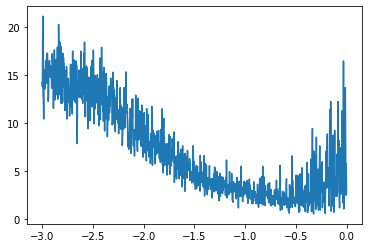

In [5]:
lre, r = model.find_lr(Xv, Yv, episodes = 10, minibatch = 32)

plt.plot(lre, r)
plt.show()

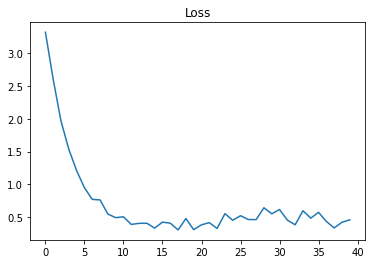

In [5]:
history = model.train(Xtr, Ytr, episodes= 40, lr=0.3)

plt.plot(history)
plt.title('Loss')
plt.show()

# Generating names with model

In [7]:
model.predict('eli')

elin
elin.


'elin.'

In [15]:
model.predict('.hu')

'.huvayaane.'